## An analysis of rugby games statistics since 1992

Jean-Eudes Peloye and Antoine Redier

In [36]:
import pandas as pd
import sqlite3

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
# Load the dataset
conn = sqlite3.connect("./rugby_data.db")

In [15]:
pd.read_sql_query("""
    SELECT M.id, M.home_team_id, M.away_team_id, M.won, MS1.scored, MS1.conceded, (MS1.scored - MS1.conceded) AS diff, MS1.tries, MS1.conversions, MS1.penalties, MS1.drops, M.date
    FROM matchs AS M 
    INNER JOIN matchstats AS MS1 ON MS1.match_id = M.id AND MS1.team_id = M.home_team_id
    ORDER BY M.date ASC 
    """, conn)

,id,home_team_id,away_team_id,won,scored,conceded,diff,tries,conversions,penalties,drops,date
0,161361,92,59,0,8,16,-8,1.0,0.0,1.0,0.0,2012-06-09 00:00:00.000000
1,154932,10,20,1,37,22,15,4.0,4.0,3.0,0.0,2012-06-09 00:00:00.000000
2,161857,25,11,1,28,25,3,3.0,2.0,3.0,0.0,2012-06-09 00:00:00.000000
3,154472,5,1,1,22,17,5,2.0,0.0,4.0,0.0,2012-06-09 00:00:00.000000
4,157634,81,84,1,33,3,30,5.0,4.0,0.0,0.0,2012-06-09 00:00:00.000000
5,145435,74,139,0,5,52,-47,1.0,0.0,0.0,0.0,2012-06-09 00:00:00.000000
6,161859,23,16,0,20,24,-4,2.0,2.0,2.0,0.0,2012-06-10 00:00:00.000000
7,164514,12,214,1,23,21,2,2.0,2.0,3.0,0.0,2012-06-12 00:00:00.000000
8,161860,25,20,0,16,25,-9,1.0,1.0,3.0,0.0,2012-06-15 00:00:00.000000
9,161862,11,81,1,36,20,16,4.0,2.0,4.0,0.0,2012-06-16 00:00:00.000000


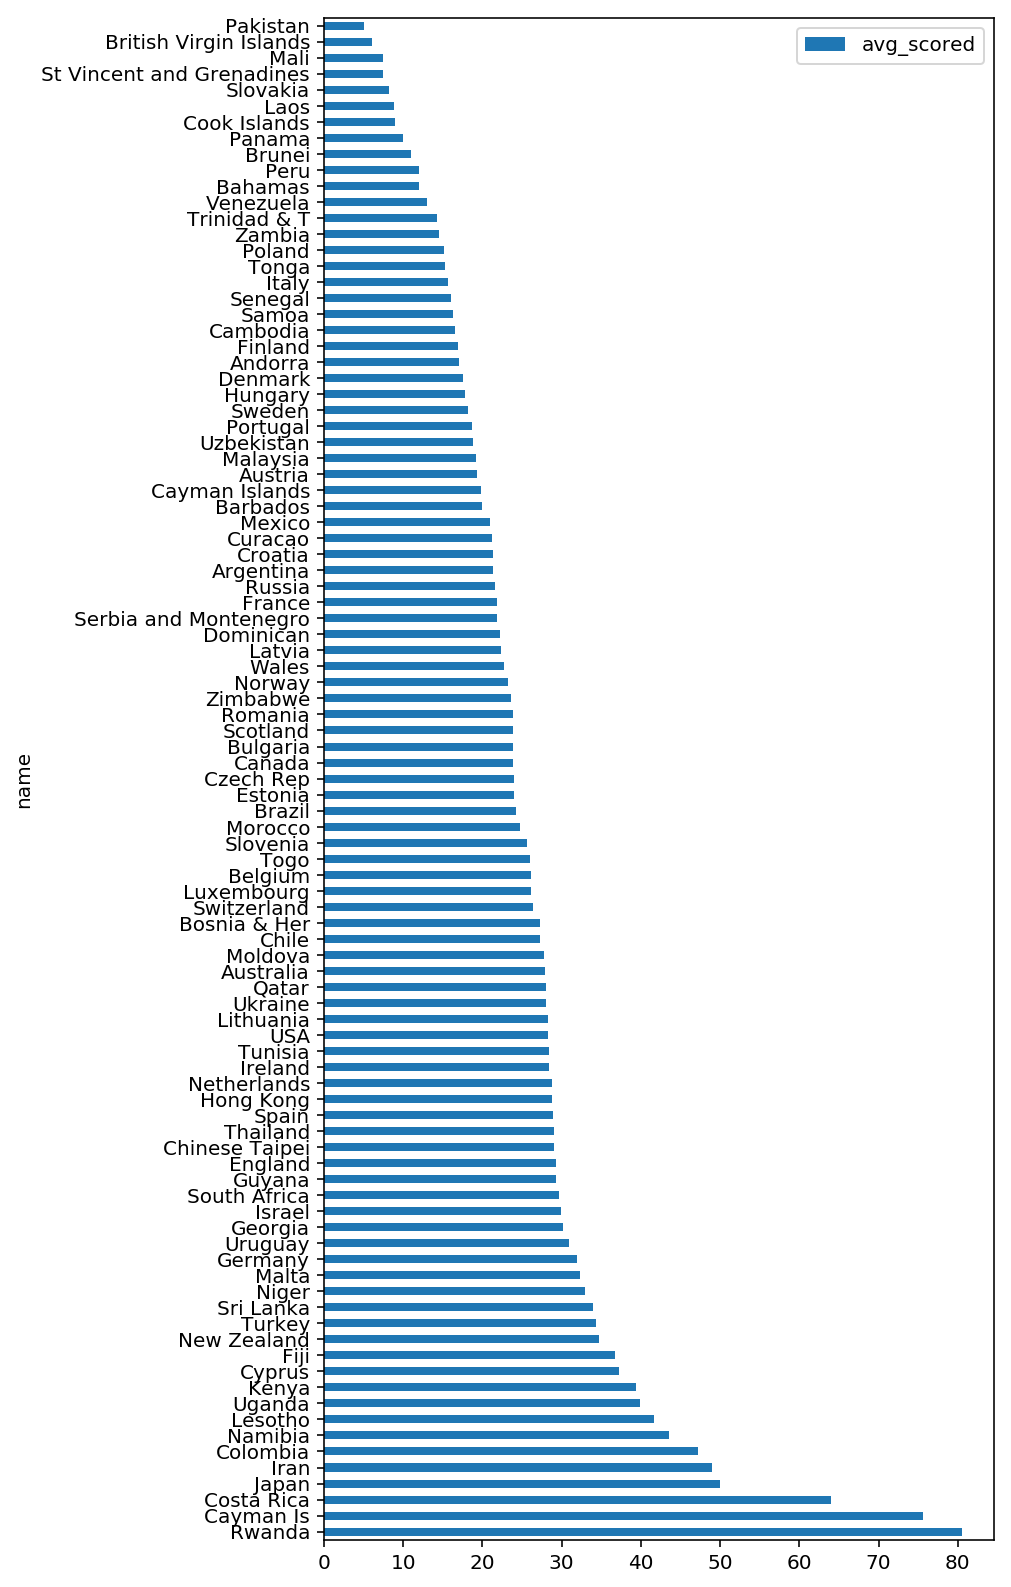

In [37]:
pd.read_sql_query("""
    SELECT M.home_team_id, T.name, COUNT(*) AS matches, SUM(M.won) AS won, AVG(MS1.scored) AS avg_scored, AVG(MS1.conceded) AS avg_conceded, (AVG(MS1.scored) - AVG(MS1.conceded)) AS avg_diff
    FROM matchs AS M 
    INNER JOIN matchstats AS MS1 ON MS1.match_id = M.id AND MS1.team_id = M.home_team_id
    INNER JOIN teams AS T ON T.id = M.home_team_id
    GROUP BY T.name
    """, conn).sort_values(by="avg_scored", ascending=False).plot(x = "name", y = "avg_scored", kind="barh", figsize=(6,14))